In [21]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt

In [81]:
# Datos
df = pd.read_csv('./PIB.csv', sep=";")
df = df.dropna()
df.head(10)

,Year,Country,PIB
0,1960,Ecuador,9.547575
1,1961,Ecuador,8.957493
2,1962,Ecuador,10.241499
3,1963,Ecuador,9.233322
4,1964,Ecuador,8.900054
5,1965,Ecuador,8.979657
6,1966,Ecuador,10.485700
7,1967,Ecuador,10.107187
8,1968,Ecuador,11.042166
9,1969,Ecuador,8.502946


<AxesSubplot:title={'center':'Ecuador'}, xlabel='Year'>

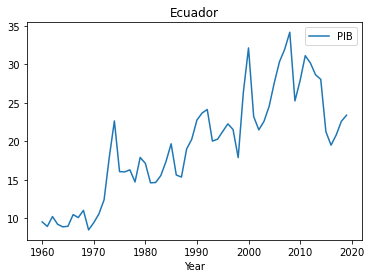

In [28]:
df.plot(title="Ecuador", x ='Year', y='PIB')

In [29]:
x = list(df.iloc [:, 0]) # Año
y = list(df.iloc [:, 2]) # PIB

## Regresion Lineal

In [30]:
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [0.33469933]
Independent term: 
 -646.4453724135692


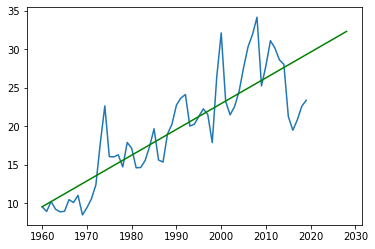

In [41]:
#Graficar
plt.plot(x, y,'-')
x_real = np.array(range(min(x), max(x)+10))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

## Regresión logística

In [42]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

log_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(log_fit)

(array([-5042.50308283,   666.43076693]), array([[173833.27856382, -22886.01722099],
       [-22886.01722099,   3013.06215096]]))


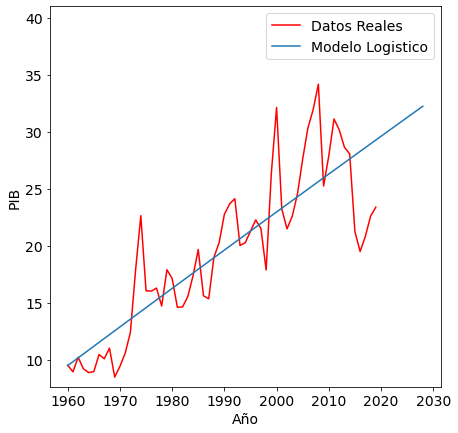

In [79]:
pred_x = list(range(min(x),max(x)+10)) # Predecir 10 años mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.plot(x,y,'-',label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,log_fit[0][0],log_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Año")
plt.ylabel("PIB")
plt.ylim((min(y)*0.9,max(y)*1.2)) # Definir los limites de Y
plt.show()

## Regresión polinómica

In [77]:
pf = PolynomialFeatures(degree = 2)
XPoly = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(XPoly, y)
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 0.00000000e+00  1.98998020e+01 -4.91709038e-03], b = -20107.35650068568


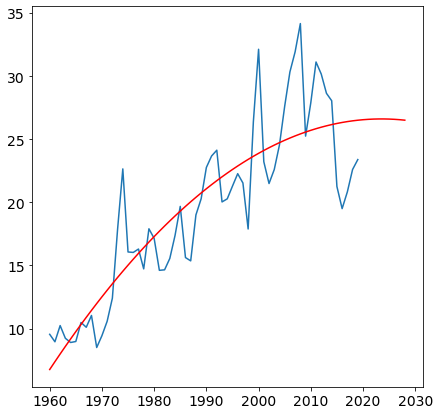

In [78]:
#Graficar
plt.plot(x, y, '-')
x_real = np.array(range(min(x), max(x)+10))
plt.plot(x_real, regresion_lineal.predict(pf.fit_transform(x_real.reshape(-1, 1))), color='red')
plt.show()